In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# June 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [6]:
print(f'R2 score (train): {reg.score(X_train, y_train):.4f}')
print(f'R2 score (test): {reg.score(X_test, y_test):.4f}')

R2 score (train): 1.0000
R2 score (test): 0.6221


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(5, 16),
    'min_samples_leaf': np.arange(2, 11),
}
reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(reg, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 13, 'min_samples_leaf': 10}


In [8]:
print(f'R2 score (train): {grid_search.score(X_train, y_train):.4f}')
print(f'R2 score (test): {grid_search.score(X_test, y_test):.4f}')

R2 score (train): 0.8474
R2 score (test): 0.7227


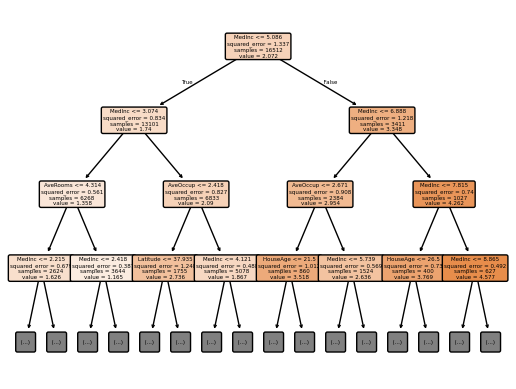

In [9]:
from sklearn import tree

model = grid_search.best_estimator_
tree.plot_tree(model, max_depth=3, feature_names=feature_names, 
               filled=True, rounded=True, fontsize=4)
plt.savefig('figures/california_housing_regression_tree.pdf', bbox_inches='tight')

Feature Importances

In [10]:
# Sort the features by their importance in a descending order
sorted_idx = np.argsort(model.feature_importances_)[::-1] 

for idx in sorted_idx:
    print(f'{feature_names[idx]}: {model.feature_importances_[idx]:.4f}')

MedInc: 0.6022
AveOccup: 0.1323
Latitude: 0.0849
Longitude: 0.0719
HouseAge: 0.0470
AveRooms: 0.0392
AveBedrms: 0.0118
Population: 0.0106
